# Homework Week 07
Nicola Zomer <br>
19 December, 2022

# Assignment
Calculate the avalanche duration probability $P_>(t)$ if $\lambda i = \lambda$ for all $t$ and all neurons. This leads, as only sketched in class, to the following integral: 
$$
    \gamma \int_0^\infty d\lambda \cdot \exp(-\gamma\lambda)\cdot(1-\exp(-\delta\lambda))^n
$$
which can be solved through the saddle point approximation.

Optional. Create a time series $\lambda(t)$, with $t=1,2,...,T$ where at each time $t$, the value of $\lambda$ is extracted from an exponential distribution. Then simulate $N=100$ independent heterogeneous Poisson processes, where each one describes the spikes events of a single neuron, but all have the same time dependent rate parameter $\lambda(t)$.

## Calculation of the avalanche duration probability
The derivation of the above integral and its solution using the Saddle Point approximation is given in the attached pdf.

## Simulation (optional point)
After extracting the values of $\lambda$ from an exponential distribution, we simulate such process following 3 steps:
1. Select the maximum firing rate in the interval $[0, T]$:
    $$
        \lambda_{max} = \max_{t\in [0, T]} \lambda(t)
    $$
2. Generate a spike train with constant frequency $\lambda_{max}$. This corresponds to simulating an Homogeneous Poisson Process with rate $\lambda_{max}$. 
3. **Thinning**: some sample are discarded to reduce the spike rate. For each spike $i$, generate a random number from a uniform distribution, $x_{rand}^i\sim\mathcal{U}(0, 1)$. The spike is removed if:
    $$
        \frac{\lambda_i}{\lambda_{max}}<x_{rand}^i
    $$

### Simulation of the HPP
About step 2, this simulation is performed by sampling interarrival times $\tau_i$ from the corresponding exponential distribution $\tau_i \sim Exp(\lambda_{max})$, such that $\sum_i \tau_i \leq T$. As we are dealing integer times, we convert $\tau_i$ to `int`. The cumulative sum of $\tau_i$ gives us the times at which the considered neuron spikes.

After creating an $N\times T$ matrix, we set to 1 the elements $(i, j)$ that correspond to the activation of neuron $i$ at time $j$. 


In [115]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


# initialization
np.random.seed(1234)

T = 200        # number of time intervals 
N = 100        # number of neurons
gamma = 10     # gamma

lambda_j = np.random.exponential(scale = (1/gamma), size=T)     # time series lambda(t)
lambda_max = np.max(lambda_j)

neurons_spikes = np.zeros((N, T))

# homogeneous Poisson Process
def homogeneous_poisson_process(lambda_, t_0, t_end):
    assert isinstance(t_0, int)  , 't_0 must be integer'
    assert isinstance(t_end, int), 't_end must be integer'
    
    spikes = np.zeros(t_end-t_0)
    
    tau = np.random.exponential(scale = (1/lambda_), size=1)[0]
    tot_time = tau
    
    while tot_time<T:
        spikes[int(tot_time)] = 1
        
        tau = np.random.exponential(scale = (1/lambda_), size=1)[0]
        tot_time += tau
    
    return spikes
        
       
# thinning
def thinning(spikes_matrix):
    '''
    spikes_matrix: binary matrix, 1 if a spike occurs in neuron i at time j
    
    '''
        
    for i in range(spikes_matrix.shape[0]):
        for j in range(spikes_matrix.shape[1]):
            if spikes_matrix[i, j]==1:
                x_rand = np.random.uniform()
                
                if lambda_j[j]/lambda_max<x_rand:
                    spikes_matrix[i, j] = 0
    
    return spikes_matrix


# simulation
for i in range(N):
    neurons_spikes[i, :] = homogeneous_poisson_process(lambda_max, 0, T)
    
neurons_spikes = thinning(neurons_spikes)


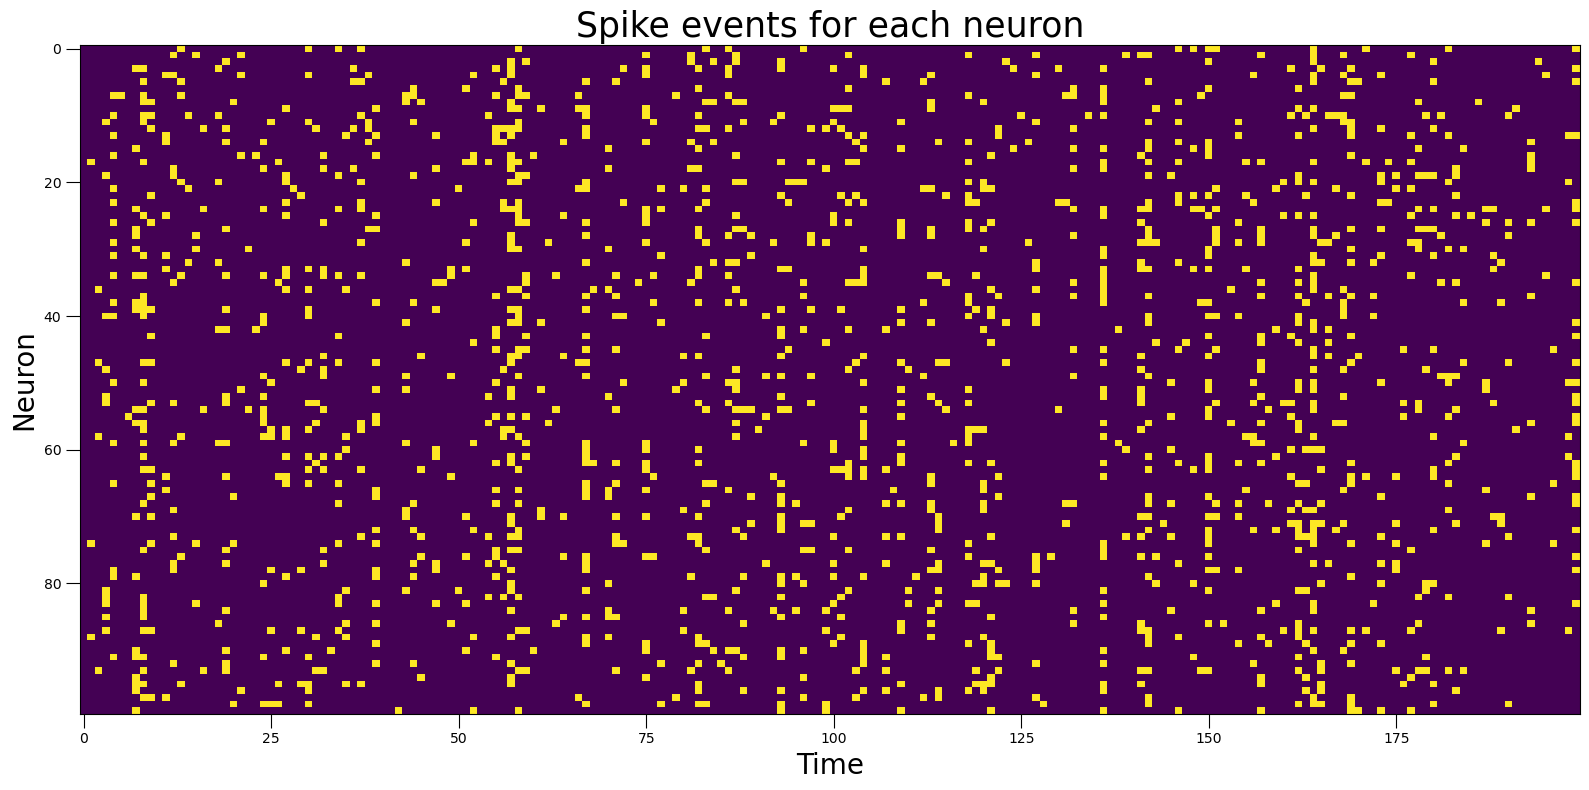

In [117]:
# heatmap
fig , ax = plt.subplots(figsize=(16, 8))

ax.imshow(neurons_spikes, cmap='viridis', aspect='auto')
ax.set_title('Spike events for each neuron', fontsize = 25)    
ax.set_xlabel('Time', fontsize = 20)
ax.set_ylabel('Neuron', fontsize = 20) 

ax.tick_params(axis='both', which='major', labelsize=10, length=10)

fig.tight_layout()
plt.show()

As expected, the activation map shows a correlation between the neurons. This is because they all have the same time dependent rate parameter $\lambda(t)$.